In [5]:
import pandas as pd
import numpy as np
import io
import scipy as sp
import scipy.fftpack
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt

In [6]:
%%html
<style>
table {display: block; align: left;}
</style>

In [7]:
chanDNSReT = {
    "ReT_180" : 178.12,
    "ReT_395" : 392.24,
    "ReT_590" : 587.19,
    "ReT_1000" : 1000.512,
    "ReT_2000" : 1994.756,
    "ReT_5200" : 5185.897   
}

chanDNSMeans = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_means.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_means.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_means.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_means.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_means.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_means.txt"    
}

chanDNSReys = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_rey.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_rey.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_rey.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_rey.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_rey.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_rey.txt"    
}

chanDNSk = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_k.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_k.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_k.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_k.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_k.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_k.txt"    
}


chanMeans = {}
chanReys = {}
chanK = {}

for key in chanDNSMeans:
    chanMeans[key] = pd.read_csv(chanDNSMeans[key], delim_whitespace=True)
    chanReys[key] = pd.read_csv(chanDNSReys[key], delim_whitespace=True)
    chanK[key] = pd.read_csv(chanDNSk[key], delim_whitespace=True)

In [30]:
chanRESsst = {
    "ReT_395" : "./paraview_output_time74_395_nate_sst.csv",   
}

chanSimSST = {}

for key in chanRESsst:
    chanSimSST[key] = pd.read_csv(chanRESsst[key])

for key in chanSimSST['ReT_395']:
    print(key)

GradU:0
GradU:1
GradU:2
GradU:3
GradU:4
GradU:5
GradU:6
GradU:7
GradU:8
Points:0
Points:1
Points:2
Vorticity:0
Vorticity:1
Vorticity:2
density
minimum_distance_to_wall
pressure
pressure_force_:0
pressure_force_:1
pressure_force_:2
specific_dissipation_rate
sst_f_one_blending
tau_wall
turbulent_ke
turbulent_viscosity
velocity_:0
velocity_:1
velocity_:2
viscous_force_:0
viscous_force_:1
viscous_force_:2
yplus


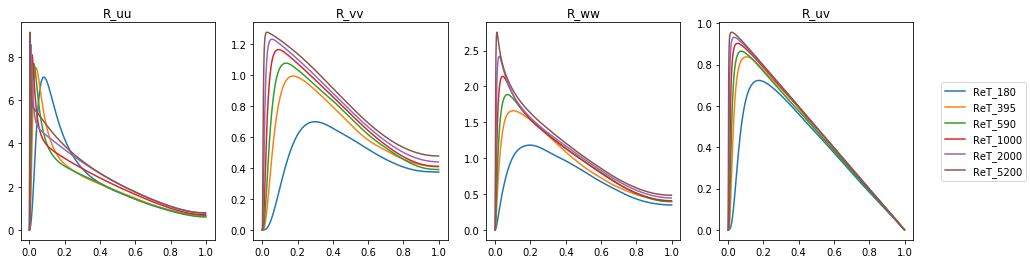

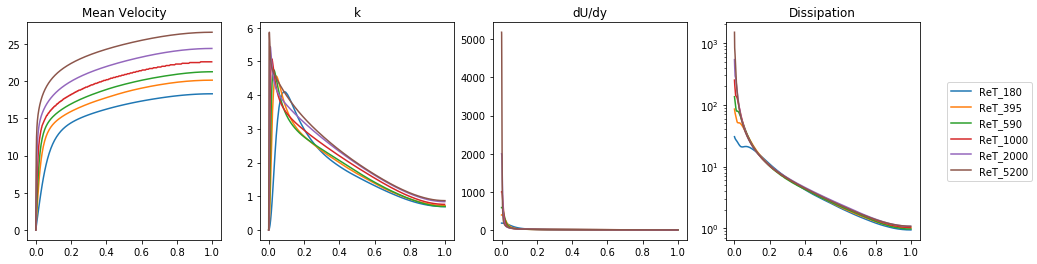

In [8]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))


for key in chanReys:
    ax1.plot(chanReys[key]['y'],chanReys[key]['R_uu'])
    ax1.set_title("R_uu")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['R_vv'])
    ax2.set_title("R_vv")
    #ax2.set_xscale('log')
    
    ax3.plot(chanReys[key]['y'],chanReys[key]['R_ww'])
    ax3.set_title("R_ww")
    #ax3.set_xscale('log')
    
    ax4.plot(chanReys[key]['y'],-1*chanReys[key]['R_uv'])
    ax4.set_title("R_uv")
    #ax4.set_xscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanReys.keys()
fig.legend(handles, labels, loc='center right')

plt.show()


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))

for key in chanMeans:
    ax1.plot(chanMeans[key]['y'],chanMeans[key]['Umean'])
    ax1.set_title("Mean Velocity")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['k'])
    ax2.set_title("k")
    #ax2.set_xscale('log')
    
    ax3.plot(chanMeans[key]['y'],chanMeans[key]['dUmean/dy'])
    ax3.set_title("dU/dy")
    #ax3.set_yscale('log')
    
    ax4.plot(chanK[key]['y'],chanK[key]['dissip']*chanDNSReT[key])
    ax4.set_title("Dissipation")
    ax4.set_yscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanMeans.keys()
fig.legend(handles, labels, loc='center right')

plt.show()

## Y+ Values For Channel Flow

For $Re_{\tau}$ of 395, 2000, and 18000, we want to choose $\Delta y$ near the wall that will resolve the turbulence as it inhabits a thinner and thinner layer near the wall with increasing $Re_{\tau}$. To do this, we only need two equations:

$ y^+ \equiv \dfrac{u^* \Delta y}{\nu} $

$ u^* = \sqrt{\nu \dfrac{\partial u}{\partial y}\bigg|_w}$

So for a $y^+ = 1$, given $u^* = 1$ (choosing $\nu$ to be $1/\tfrac{\partial u}{\partial y}|_w$), then the first grid cell $\Delta y$ is equal to the numerical value of $\nu$ or $1/Re_{\tau}$


## Mesh Sizes For Channel Flow

Channel size (following Gritskevitch) is H=2 in the y direction, and 4H in the x (streamwise) direction, and 1.5H in the z (spanwise) direction.

| $Re_{\tau}$   |  $Re_{\tau}$ DNS Actual  | $\Delta x$  | $x_n$ | $\Delta y$ | $y_n$ | $\Delta z$ | $z_n $ | $\Delta y_w$ at $y^+=1$ |
|---|---|---|---|---|---|---|---|
| 395  | 392.24  | 0.1 | 80 | Variable  | 128 | 0.05 | 40 | 0.00253 |
| 2000 | 1994.756  | 0.1 | 80 | Variable  | 192 | 0.05 | 40 | 0.0005 |
| 18000  | N/A  | 0.1 | 80 | Variable | 256 | 0.05 | 40 | 5.556e-5  |

Note that the $y_n$ value is not noted in (Gritskevich, 2012) and instead the statement is made: "In the wall normal direction, different grids were used providing a sufficient resolution ($y_w^+ < 1$ near the wall) at different Reynolds numbers." Unfortunately this isn't much to go on. However, the two bases for chosing $y_n$ are that the expansion ratio from the first grid cell does not exceed ~20-25%, and that the center of the channel grid size is approximately equal to the turbulent length scale divided by some constant (in the plot below I've chosen 8). For the given range of $Re_{\tau}$ this infers a maximum center channel grid size of $0.07m$, which is close to the (0.1,0.05) given in Gritskevich.


## Pressure Driven Flow

The flow was driven with a constant pressure gradient: 

$\dfrac{\partial p}{\partial x}=\dfrac{- 2\rho u_{\tau}^2}{H}$

So in choosing a channel half height, $\delta$, of 1.0m, and a fluid density $\rho=1.0kg/m^3$ our constant pressure gradient is equal to $-1.0 kg/m^2s^2$.  

## Length Scale For Mesh Sizing

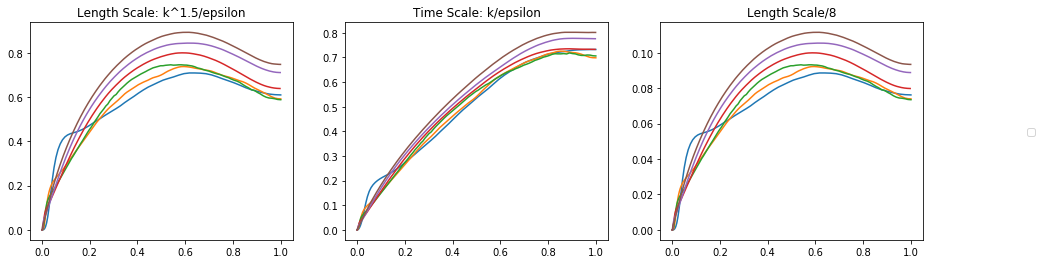

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

for key in chanMeans:
    ax1.plot(chanReys[key]['y'],(chanReys[key]['k']**1.5)/(chanK[key]['dissip']*chanDNSReT[key]))
    ax1.set_title("Length Scale: k^1.5/epsilon")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['k']/(chanK[key]['dissip']*chanDNSReT[key]))
    ax2.set_title("Time Scale: k/epsilon")
    #ax2.set_xscale('log')
    
    ax3.plot(chanReys[key]['y'],(chanReys[key]['k']**1.5)/(8*chanK[key]['dissip']*chanDNSReT[key]))
    ax3.set_title("Length Scale/8")
    #ax2.set_xscale('log')

handles, labels = ax3.get_legend_handles_labels()
labels = chanReys.keys()
fig.legend(handles, labels, loc='center right')

plt.show()

The "Length Scale/8" plot should give a maximum mesh size at all points in the half-channel, given that 8 grid cells is enough to resolve an eddy. 

The time scale plot should inform any averaging of the flow-field that is done in post-processing steps. 

## Results

### ReT=395 Channel Flow

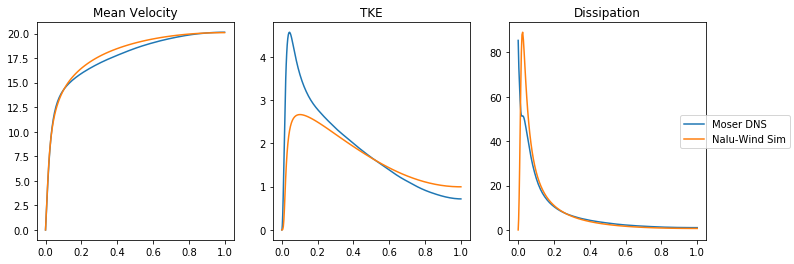

In [33]:
ret = 'ReT_395'

dns395U = chanMeans[ret]['Umean']
dns395k = chanReys[ret]['k']
dns395yr = chanReys[ret]['y']
dns395y = chanMeans[ret]['y']
dns395dis = chanK[ret]['dissip']*chanDNSReT[ret]

sim395y = chanSimSST[ret]['Points:1']
sim395U = chanSimSST[ret]['velocity_:0']
sim395k = chanSimSST[ret]['turbulent_ke']
sim395dis = 0.09*chanSimSST[ret]['turbulent_ke']*chanSimSST[ret]['specific_dissipation_rate']

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

ax1.plot(dns395y,dns395U, label="Moser DNS")
ax1.plot(sim395y,sim395U, label="Nalu-Wind Sim")
ax1.set_title("Mean Velocity")

ax2.plot(dns395yr,dns395k, label="Moser DNS")
ax2.plot(sim395y,sim395k, label="Nalu-Wind Sim")
ax2.set_title("TKE")

ax3.plot(dns395y,dns395dis, label="Moser DNS")
ax3.plot(sim395y,sim395dis, label="Nalu-Wind Sim")
ax3.set_title("Dissipation")

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()
